# Problem 5: Collaborative Filtering

In [4]:
import numpy as np
import pandas as pd
from fastai.tabular import *
from fastai.collab import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = './drive/MyDrive/ml-data/songsDataset.csv'

In [8]:
df = pd.read_csv(file_path, header=0, names=['userId', 'songId', 'rating'])
df.head()

,userId,songId,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [9]:
dls = CollabDataLoaders.from_df(df, valid_pct=0.2)

In [10]:
dls.show_batch()

,userId,songId,rating
0,35613,46599,5
1,41939,130281,2
2,136847,2726,5
3,34723,22193,4
4,124056,106434,4
5,100703,62043,5
6,182276,33406,5
7,107553,98606,1
8,40644,55122,3
9,96492,33640,5


In [11]:
df['rating'].min(), df['rating'].max()

(1, 5)

In [12]:
y_range = [0.5, 5.5]

In [13]:
learn = collab_learner(dls, n_factors=30, y_range=y_range)

In [16]:
learn.fit_one_cycle(5, 0.005)

epoch,train_loss,valid_loss,time
0,2.221892,2.252619,02:52
1,1.934302,2.061586,02:52
2,1.570828,2.006007,02:52
3,1.235479,1.992940,02:52
4,0.928648,1.993872,02:52


SuggestedLRs(lr_min=0.03019951581954956, lr_steep=2.2908675418875646e-06)

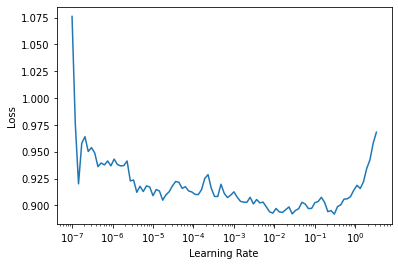

In [17]:
learn.lr_find()

In [21]:
for n_factors in [5, 10, 20, 30]:
    print(f'n_factors = {n_factors}')
    learn = collab_learner(dls, n_factors=n_factors, y_range=y_range)
    learn.fit_one_cycle(5, 3e-2)

n_factors = 5


epoch,train_loss,valid_loss,time
0,2.274466,2.260384,02:24
1,2.255766,2.258952,02:26
2,2.140938,2.167526,02:23
3,2.000085,2.041754,02:24
4,1.765237,2.001532,02:23


n_factors = 10


epoch,train_loss,valid_loss,time
0,2.284218,2.288891,02:23
1,2.342535,2.300019,02:24
2,2.187188,2.189104,02:24
3,1.984043,2.046922,02:24
4,1.752208,2.011168,02:24


n_factors = 20


epoch,train_loss,valid_loss,time
0,2.314926,2.350694,02:36
1,2.344214,2.373993,02:36
2,2.227337,2.221590,02:36
3,2.034488,2.055012,02:36
4,1.586037,2.018932,02:36


n_factors = 30


epoch,train_loss,valid_loss,time
0,2.353470,2.415607,02:51
1,2.395998,2.441391,02:51
2,2.293107,2.264461,02:51
3,2.005691,2.062998,02:51
4,1.499122,2.025003,02:51
